In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("23-boston.csv")

In [3]:
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [8]:
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [9]:
df = pd.read_csv("23-boston.csv", header = None, delimiter= r"\s+", names = column_names)

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [32]:
import math
def plot_all_histograms(df, title_prefix = ""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize = (5 * n_cols, 4 * n_rows))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

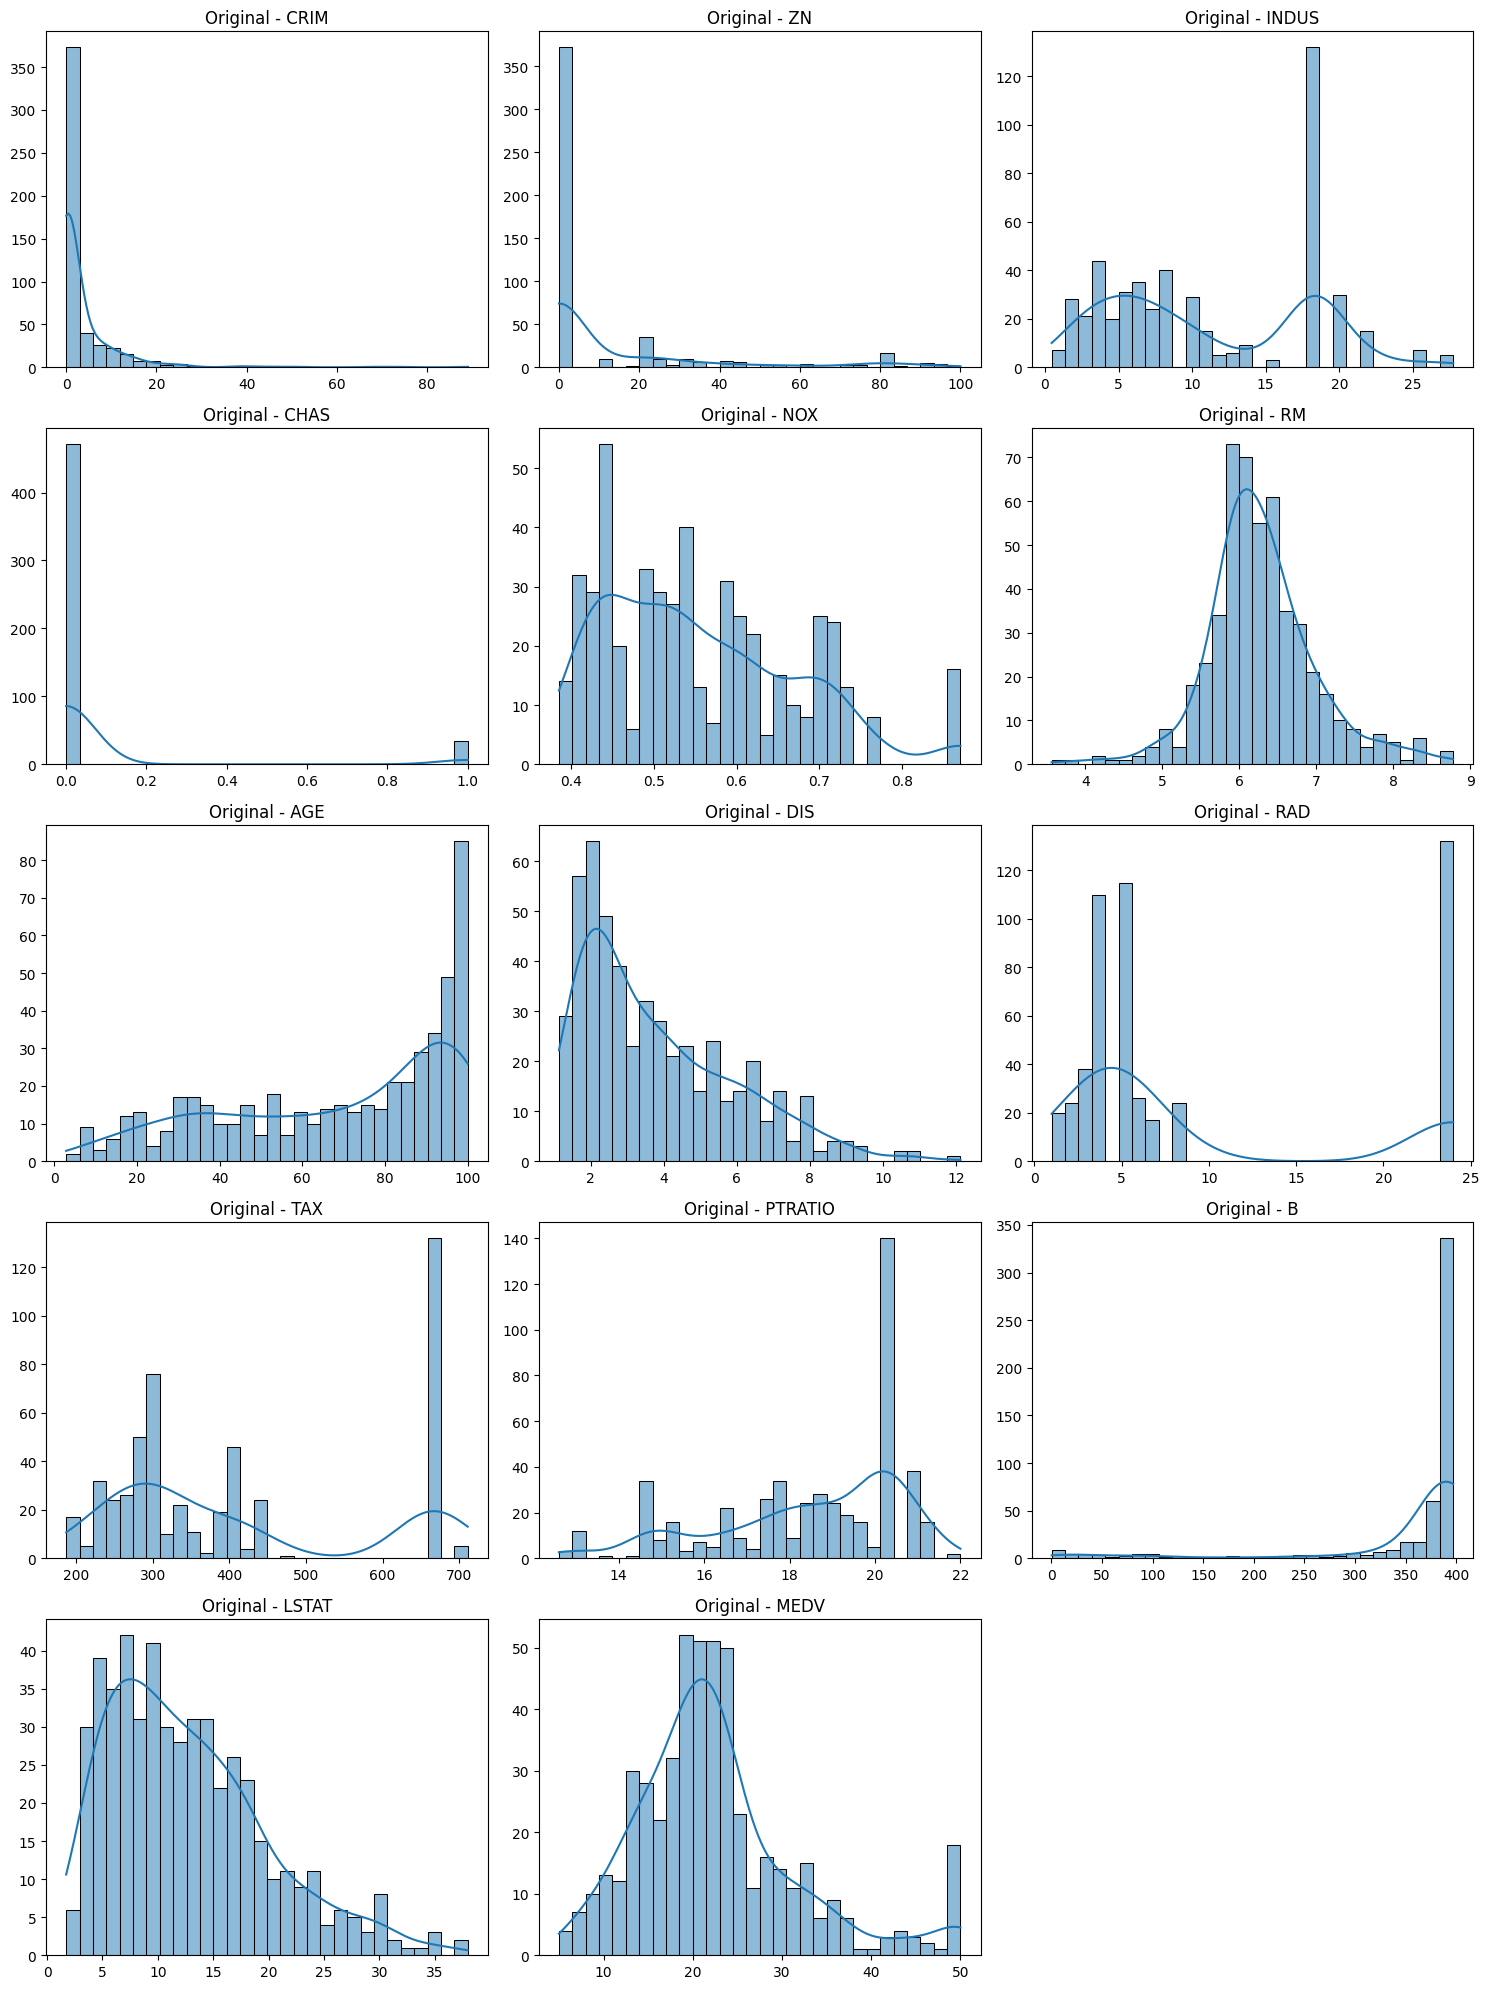

In [33]:
plot_all_histograms(df, title_prefix = "Original - ")

In [34]:
from scipy.stats import skew

In [36]:
df.apply(skew).sort_values(ascending=False)

CRIM       5.207652
CHAS       3.395799
ZN         2.219063
MEDV       1.104811
DIS        1.008779
RAD        1.001833
LSTAT      0.903771
NOX        0.727144
TAX        0.667968
RM         0.402415
INDUS      0.294146
AGE       -0.597186
PTRATIO   -0.799945
B         -2.881798
dtype: float64

In [37]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [45]:
from sklearn.preprocessing import PowerTransformer
pt_X = PowerTransformer( method = "yeo-johnson" )


In [46]:
X_train_transformed = pt_X.fit_transform(X_train)
X_test_transformed = pt_X.transform(X_test)

column = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = column )

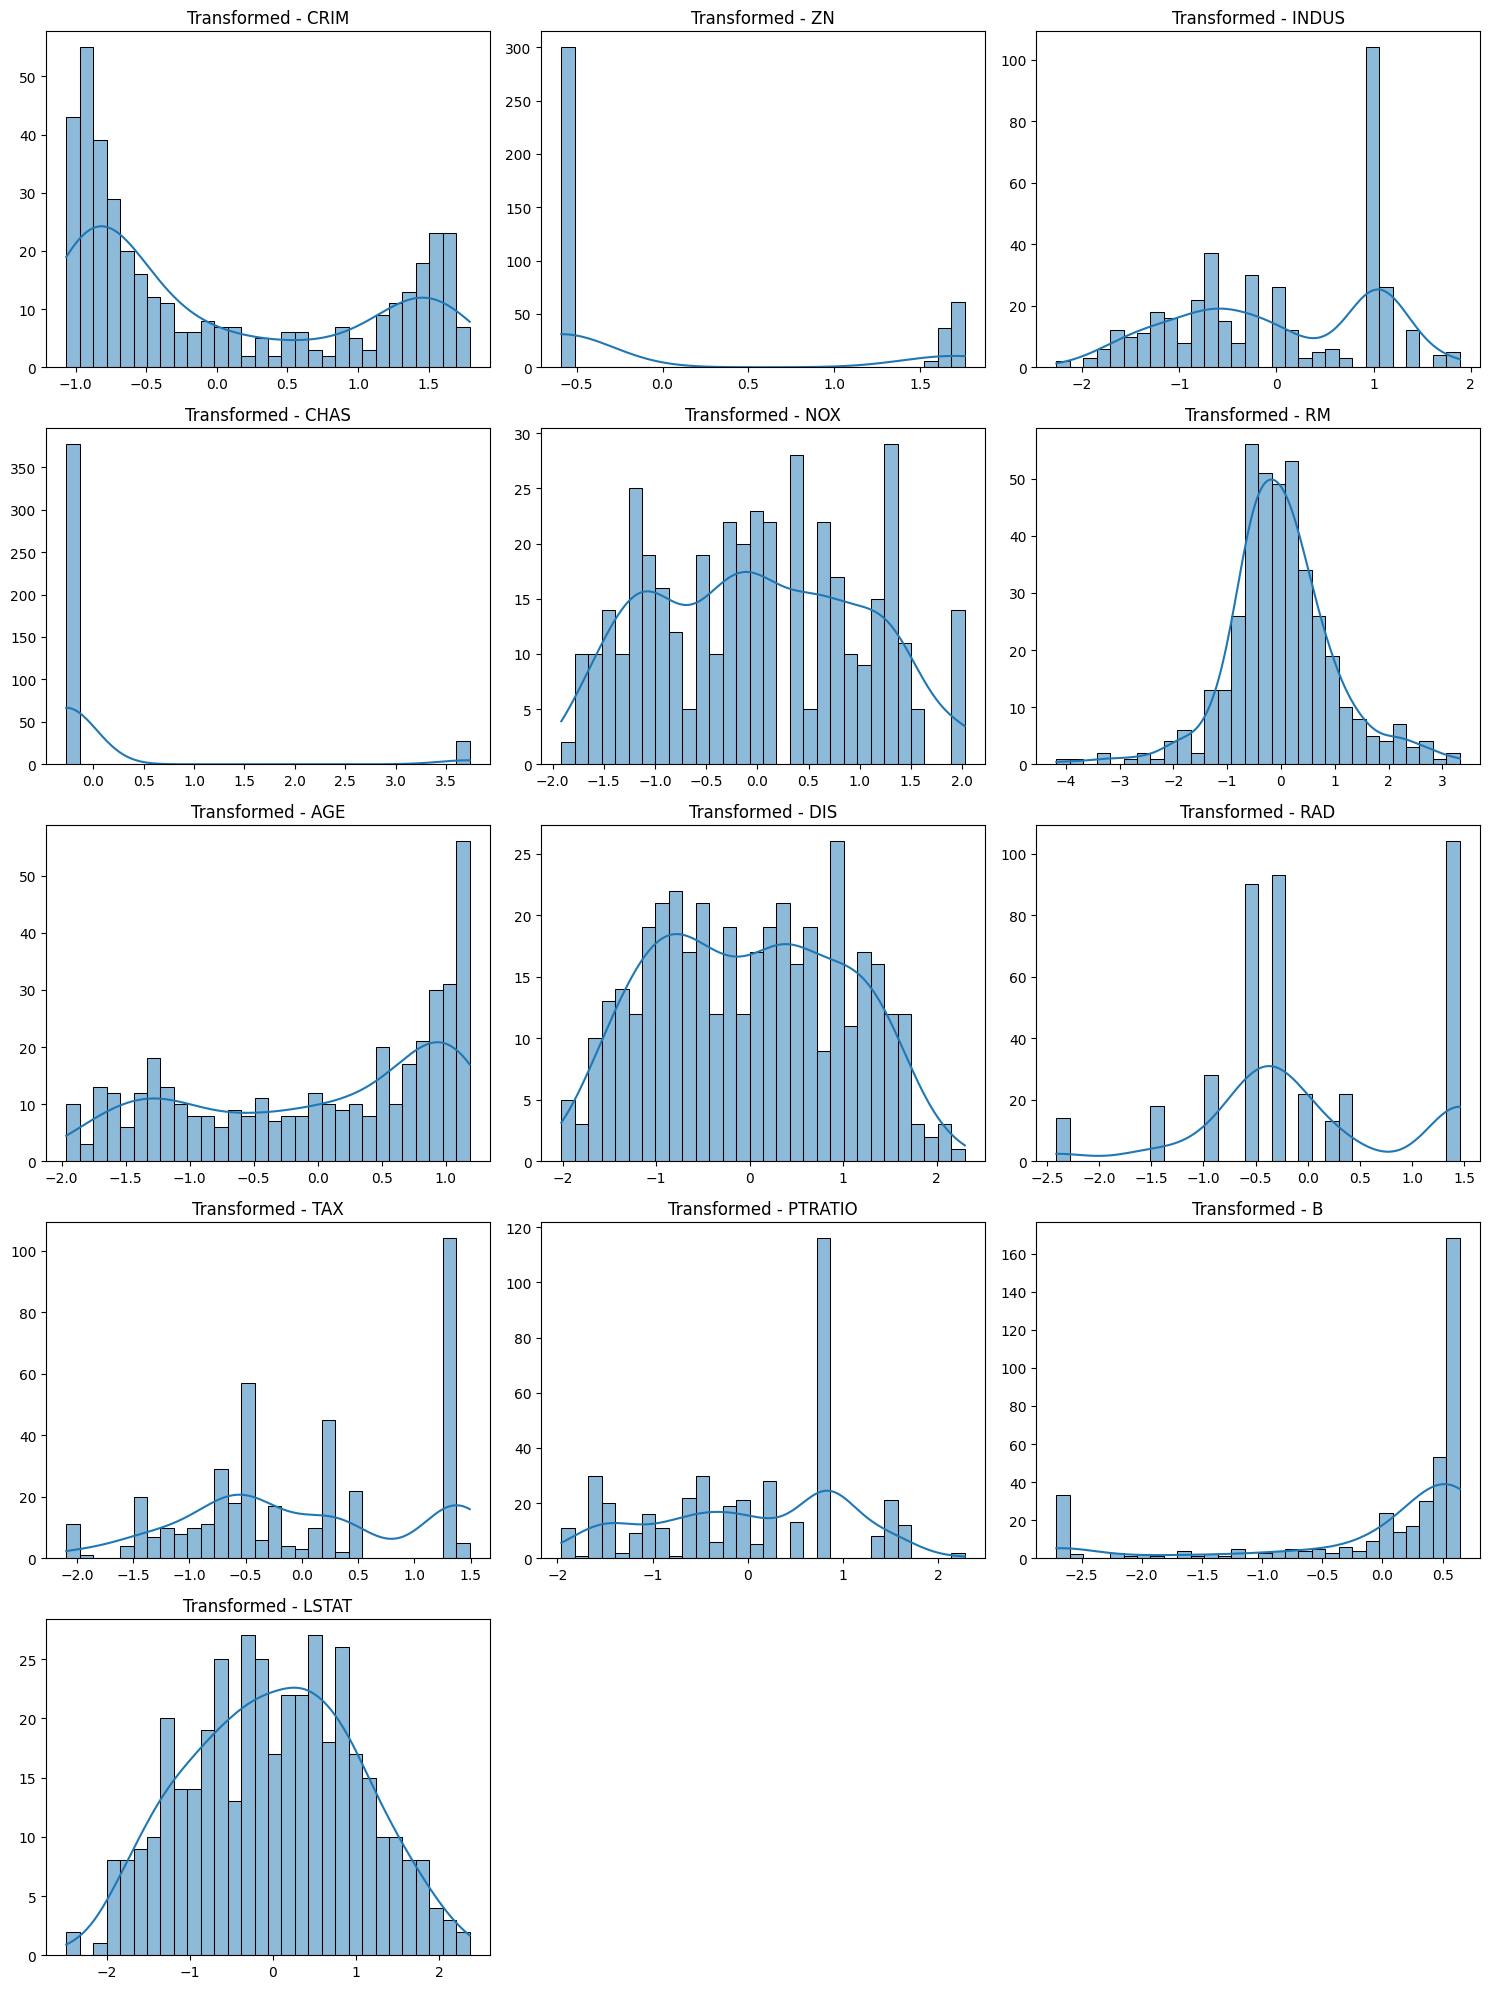

In [47]:
plot_all_histograms(X_train_transformed_df, title_prefix = "Transformed - ")

In [49]:
from scipy.stats import boxcox

In [50]:
y_train_transformed, lambda_y = boxcox(y_train)

In [51]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ +1, 1 / lambda_)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()
model.fit(X_train_transformed, y_train_transformed)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
y_pred_transfromed = model.predict(X_test_transformed)

In [60]:
y_pred_original = inverse_boxcox(y_pred_transfromed, lambda_y)

In [61]:
from sklearn.metrics import r2_score, mean_squared_error

In [62]:
print("R2 Score: ", r2_score(y_test, y_pred_original))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_original))

R2 Score:  0.7755639708985014
Mean Squared Error:  17.35592805931461


In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
y_pred = model.predict(X_test)

In [65]:
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

R2 Score:  0.6920749038652132
Mean Squared Error:  23.81224546508076
